1. Procesamiento de Datos

a. Cargar y Fusionar Datos

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Recolectar basura para liberar memoria
gc.collect()

# Cargar los archivos CSV
print("Cargando archivos CSV...")
data_sessions = pd.read_csv('../datasets/train_sessions.csv')
data_purchases = pd.read_csv('../datasets/train_purchases.csv')
data_sessions_test = pd.read_csv('../datasets/test_full_sessions.csv')
data_purchases_test = pd.read_csv('../datasets/test_full_purchases.csv')
data_items_features = pd.read_csv('../datasets/item_features.csv')
data_candidates = pd.read_csv('../datasets/candidate_items.csv')
print("Archivos CSV cargados.")
print("----------------------------------------------------------------")

Cargando archivos CSV...
Archivos CSV cargados.
----------------------------------------------------------------


In [2]:
print(data_sessions.isnull().values.any())
print(data_purchases.isnull().values.any())
print(data_items_features.isnull().values.any())
print(data_candidates.isnull().values.any())

False
False
False
False


Pues no hay valores nulos/anómalos!

In [3]:
data_sessions

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211
...,...,...,...
4743815,4440001,20409,2020-10-30 23:37:20.658
4743816,4440001,14155,2020-10-30 23:31:56.607
4743817,4440001,14303,2020-10-30 23:36:17.934
4743818,4440001,27852,2020-10-30 23:39:55.186


(DEBUG) Construir un dataset de todos los item_id únicos

In [4]:
data_purchases

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114
...,...,...,...
999995,4439986,2915,2021-05-13 11:56:37.464
999996,4439990,8786,2020-08-22 14:28:22.382
999997,4439994,21630,2020-11-27 20:10:28.961
999998,4439999,16962,2020-11-27 11:01:41.356


In [5]:
data_items_features

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75
...,...,...,...
471746,28143,68,351
471747,28143,55,390
471748,28143,11,109
471749,28143,73,91


In [6]:
print("Datos de entreno----------------------------------------------------------------------\n")

train_sessions_unique = data_sessions['session_id'].unique()
train_items_unique = data_sessions['item_id'].unique()

num_train_sessions = len(train_sessions_unique)
num_train_items = len(train_items_unique)

print("Número de sesiones leidas {}".format(len(data_sessions)))
print("Número de sesiones únicas {}".format(num_train_sessions))
print("Número de items únicos consultados {}".format(num_train_items))
print("Min./Max.session_id: {}...{}".format(min(train_sessions_unique), max(train_sessions_unique)))
print("Min./Max.item_id: {}...{}".format(min(train_items_unique), max(train_items_unique)))

Datos de entreno----------------------------------------------------------------------

Número de sesiones leidas 4743820
Número de sesiones únicas 1000000
Número de items únicos consultados 23496
Min./Max.session_id: 3...4440001
Min./Max.item_id: 2...28143


Asegurarse de que cada sesión session_id de -data_sessions- tenga su compra correspondiente -data_purchases-

In [7]:
print("Compras----------------------------------------------------------------------\n")

train_sessions_purchases_unique = data_purchases['session_id'].unique()
train_items_purchases_unique = data_purchases['item_id'].unique()

num_train_sessions_purchases = len(train_sessions_purchases_unique)
num_train_items_purchases = len(train_items_purchases_unique)

print("Número de sesiones leidas {}".format(len(data_purchases)))
print("Número de sesiones únicas {}".format(num_train_sessions_purchases))
print("Número de items únicos comprados {}".format(num_train_items_purchases))
print("Min./Max.session_id: {}...{}".format(min(train_sessions_purchases_unique), max(train_sessions_purchases_unique)))
print("Min./Max.item_id: {}...{}".format(min(train_items_purchases_unique), max(train_items_purchases_unique)))

Compras----------------------------------------------------------------------

Número de sesiones leidas 1000000
Número de sesiones únicas 1000000
Número de items únicos comprados 18907
Min./Max.session_id: 3...4440001
Min./Max.item_id: 3...28143


In [8]:
print("Items Candidatos de salida -------------------------------------------\n")

items_ids_candidate_unique = data_candidates['item_id'].unique()

print("Número de candidatos de salida {}".format(len(items_ids_candidate_unique)))

Items Candidatos de salida -------------------------------------------

Número de candidatos de salida 4990


In [9]:
print("Items caracterizados---------------------------------------------------------------------\n")

item_ids_features_unique = data_items_features['item_id'].unique()

print("Número de items únicos caracterizados {}".format(len(item_ids_features_unique)))
print("Min./Max.item_id {}...{}".format(min(item_ids_features_unique), max(item_ids_features_unique)))

Items caracterizados---------------------------------------------------------------------

Número de items únicos caracterizados 23691
Min./Max.item_id 2...28143


Por lo que se ve, no son consecutivos, para las secuencias, quizá sería útil indexarlos pra hacerlos consecutivos y 
minimizar el tamaño de las secuencias.

In [10]:
data_sessions_sorted = data_sessions.sort_values('date')
data_sessions_sorted

,session_id,item_id,date
4005618,3747794,11234,2020-01-01 00:00:01.359
3699175,3458777,3868,2020-01-01 00:00:21.44
4005616,3747794,9214,2020-01-01 00:00:22.294
4649622,4350716,10861,2020-01-01 00:00:48.505
4005614,3747794,27092,2020-01-01 00:02:14.538
...,...,...,...
2007607,1876524,18969,2021-05-31 23:41:37.372
3927982,3674124,2267,2021-05-31 23:41:49.965
2007606,1876524,11226,2021-05-31 23:42:01.479
3927983,3674124,23412,2021-05-31 23:43:02.747


Los datos de sesiones de entreno van del 2020-01-01 00:00:01 al 2021-05-31 23:43:33

In [11]:
data_sessions_sorted = np.sort(data_sessions['session_id'].unique())
datan_purchases_sorted = np.sort(data_purchases['session_id'].unique())
print("Cada oveja con su pareja? {}".format((data_sessions_sorted == datan_purchases_sorted).all()))
data_sessions_sorted, datan_purchases_sorted

Cada oveja con su pareja? True


(array([      3,      13,      18, ..., 4439994, 4439999, 4440001],
       dtype=int64),
 array([      3,      13,      18, ..., 4439994, 4439999, 4440001],
       dtype=int64))

In [12]:
train_sessions_sorted_arr = np.array(data_sessions.sort_values('session_id'))
train_purchases_sorted_arr = np.array(data_purchases.sort_values('session_id'))

index_session = 0
error = False

for index_purchases in range(len(train_purchases_sorted_arr)):

  # index 0 - session_id, index 1 - item_id, index 2 - date
  while index_session < len(train_sessions_sorted_arr) and train_sessions_sorted_arr[index_session][0] == train_purchases_sorted_arr[index_purchases][0]:  # session

    if train_sessions_sorted_arr[index_session][1] == train_purchases_sorted_arr[index_purchases][1]:  # item
      print("Item consultado en la salida, error!")
      error = True

    if train_sessions_sorted_arr[index_session][2] > train_purchases_sorted_arr[index_purchases][2]:  # date
      print("La fecha de compra siempre deberá ser posterior a las consultas, error!")
      error = True
      
    index_session += 1

if not error:
  print("No hay cosas raras!")

No hay cosas raras!


Ni hay artículos consultados en la salida, ni consultas de artículos posteriores en fecha a la compra 
(siempre dentro de la misma sesión)

Artículos caracterizados

In [13]:
feature_category_groupby = data_items_features.groupby(['feature_category_id'])
feature_value_groupby = data_items_features.groupby(['feature_value_id'])

print('Número de categorias distintas {}'.format(len(feature_category_groupby)))
print('Número de valores de esas categorías distintas {}'.format(len(feature_value_groupby)))

Número de categorias distintas 73
Número de valores de esas categorías distintas 890


Distribución de artículos por categorías

In [14]:
category_item_count = data_items_features[['item_id', 'feature_category_id']].drop_duplicates().groupby(['feature_category_id']).count()
category_item_count.rename(columns={"item_id": "item_count"}, inplace=True)

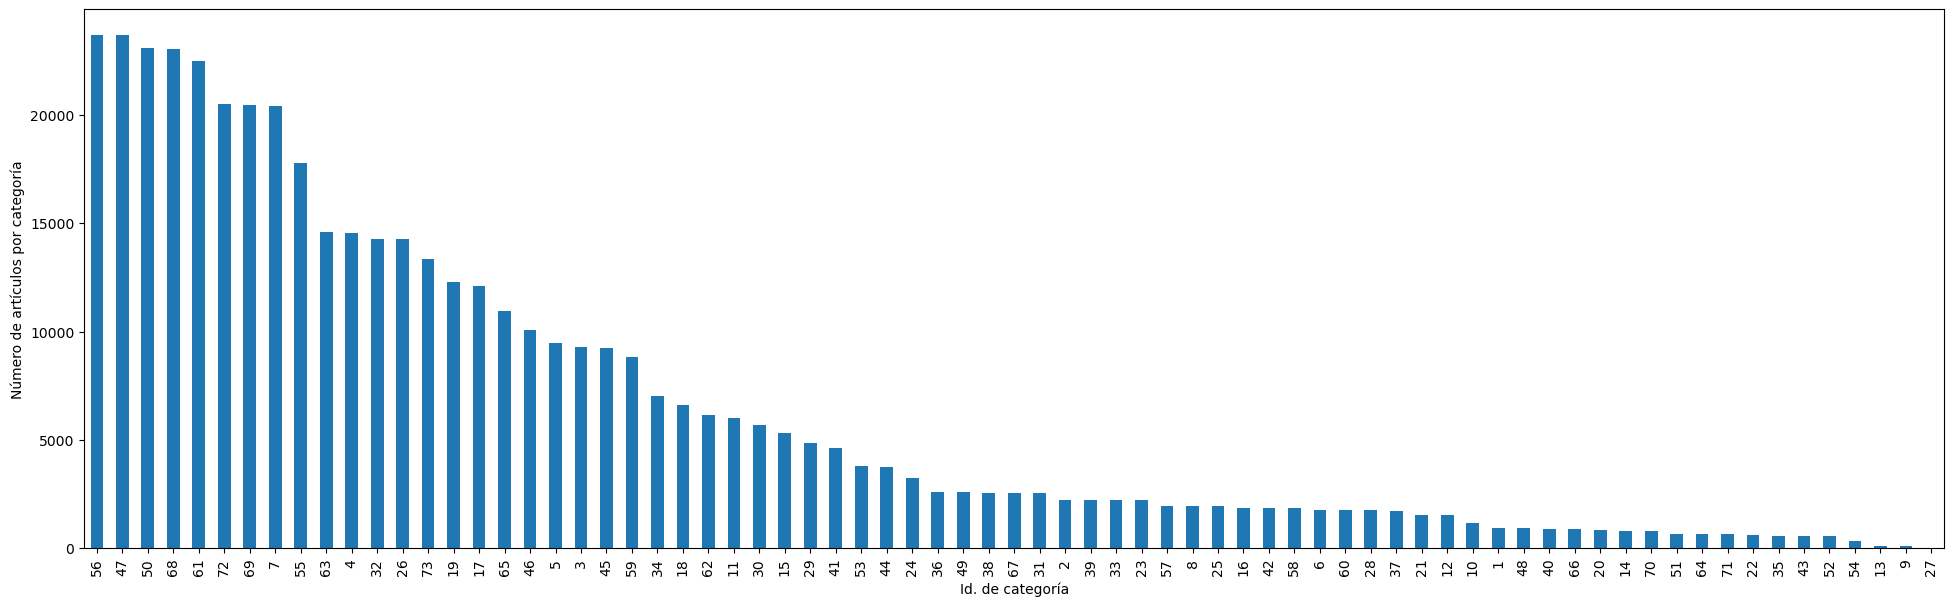

In [15]:
sorted_category_item_count = category_item_count['item_count'].sort_values(ascending=False)

sorted_category_item_count.plot(kind='bar', figsize=(24,7))
plt.xlabel('Id. de categoría')
plt.ylabel('Número de artículos por categoría')
plt.show()

Distribución de los valores de las categoría por categoría

In [16]:
category_value_count = data_items_features[['feature_category_id', 'feature_value_id']].drop_duplicates().groupby(['feature_category_id']).count()
category_value_count.rename(columns={"feature_value_id": "feature_value_count"}, inplace=True)

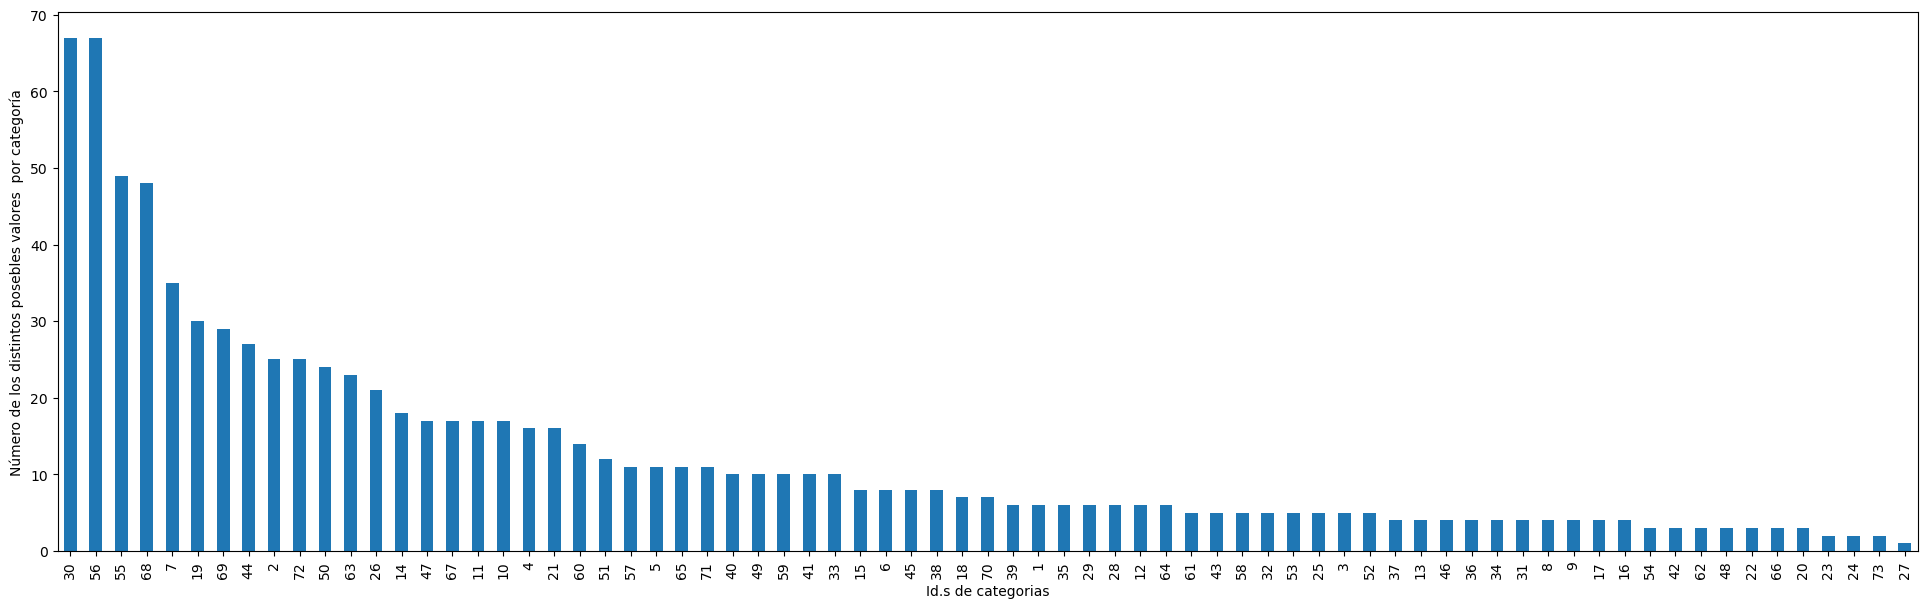

In [17]:
sorted_category_value_count = category_value_count['feature_value_count'].sort_values(ascending=False)

sorted_category_value_count.plot(kind='bar', figsize=(24,7))
plt.xlabel('Id.s de categorias')
plt.ylabel('Número de los distintos posebles valores  por categoría')
plt.show()

Dsitribución de los artíclos por los posibles valores de sus categorías

In [18]:
value_item_count = data_items_features[['item_id', 'feature_value_id']].drop_duplicates().groupby(['feature_value_id']).count()
value_item_count.rename(columns={"item_id": "item_count"}, inplace=True)

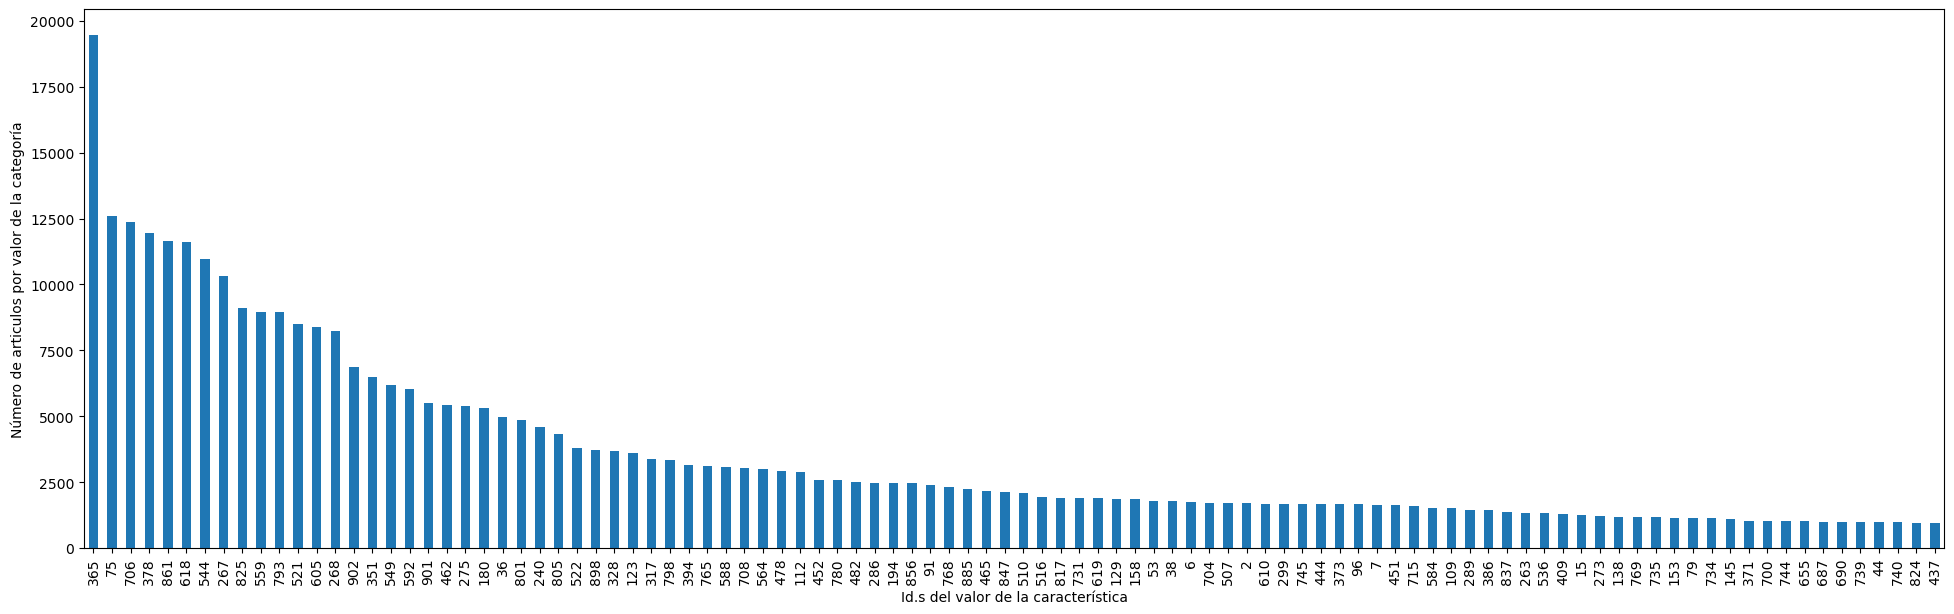

In [19]:
sorted_value_item_count = value_item_count['item_count'].sort_values(ascending=False)

sorted_value_item_count[:100].plot(kind='bar', figsize=(24,7))
plt.xlabel('Id.s del valor de la característica')
plt.ylabel('Número de articulos por valor de la categoría')
plt.show()

Distribución de las categorías sobre los artículos

In [20]:
value_category_count = data_items_features[['item_id', 'feature_category_id']].drop_duplicates().groupby(['item_id']).count()
value_category_count.rename(columns={"feature_category_id": "feature_category_count"}, inplace=True)

Max number of feature categories per item: 27
Min number of feature categories per item: 2
Average number of feature categories per item: 19
Median number of feature categories per item: 20


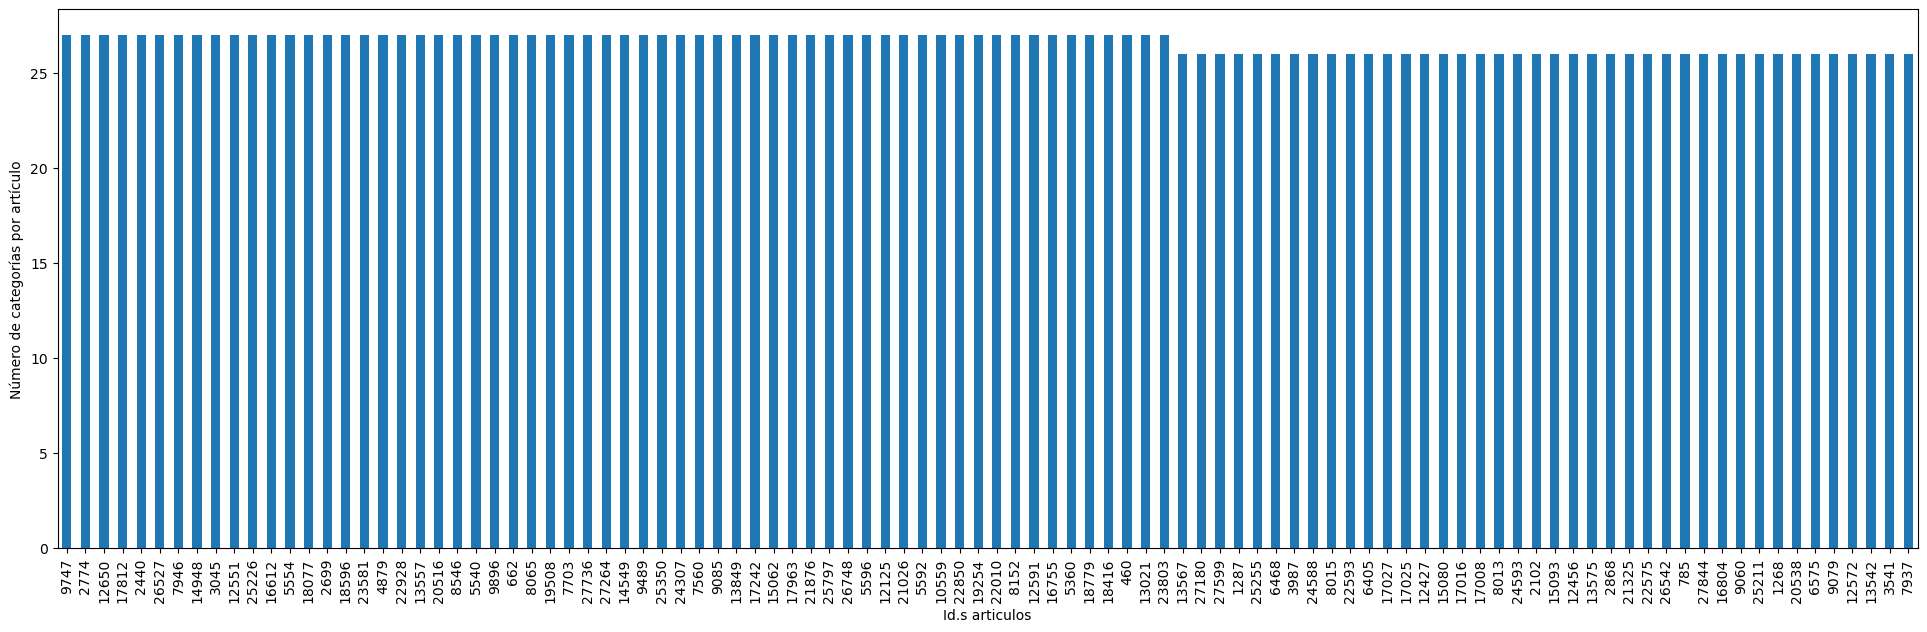

In [21]:
sorted_value_category_count = value_category_count['feature_category_count'].sort_values(ascending=False)

print('Max number of feature categories per item: {}'.format(max(value_category_count['feature_category_count'])))
print('Min number of feature categories per item: {}'.format(min(value_category_count['feature_category_count'])))
print('Average number of feature categories per item: {}'.format(round(np.average(value_category_count['feature_category_count']))))
print('Median number of feature categories per item: {}'.format(sorted_value_category_count[int(len(sorted_value_category_count) / 2)]))

sorted_value_category_count[:100].plot(kind='bar', figsize=(24,7))
plt.xlabel('Id.s articulos')
plt.ylabel('Número de categorías por artículo')
plt.show()

¿Hay mismos valores para diferentes categorías?

In [22]:
category_value_dropped = data_items_features[['feature_category_id', 'feature_value_id']].drop_duplicates()

# Si feature_value_id column se repite para varias categorías, quiere decir puede ser asociado a varias categorías

if not category_value_dropped['feature_value_id'].is_unique:
  print("Existen valores que valen para varias categorías")

Existen valores que valen para varias categorías


In [23]:
multi_category_value_ids = category_value_dropped[category_value_dropped['feature_value_id'].duplicated()]['feature_value_id'].values
print(multi_category_value_ids)
print("Hay {} multi-categorias".format(len(multi_category_value_ids)))

[123  96 194  36 418 541  32 752 273 439 400  39 184 164]
Hay 14 multi-categorias


Articulos caracterizados pero no consultados, ni comprados

In [24]:
items_features_arr = data_items_features['item_id'].unique()
print(items_features_arr, len(items_features_arr))

train_item_ids = data_sessions['item_id'].unique()
train_purchases_item_ids = data_purchases['item_id'].unique()
candidate_item_ids = data_candidates['item_id'].unique()

items_no_interactions = items_features_arr[~np.isin(items_features_arr, train_item_ids)]
items_no_interactions = items_no_interactions[~np.isin(items_no_interactions, train_purchases_item_ids)]
items_no_interactions, len(items_no_interactions)

[    2     3     4 ... 28141 28142 28143] 23691


(array([  313,   366,   575,  1152,  1364,  1883,  2497,  2523,  2677,
         2694,  3185,  3529,  3754,  3835,  4042,  4514,  5214,  5394,
         6171,  6853,  6873,  6916,  7204,  7780,  8758,  8771,  8814,
         9384,  9418,  9589, 10463, 10671, 11125, 11933, 12667, 13376,
        13618, 13943, 13972, 14395, 14622, 14723, 14967, 15601, 15629,
        16206, 17046, 17206, 17576, 18482, 18690, 18837, 19637, 20237,
        21241, 21444, 21904, 21927, 21998, 22030, 22316, 22703, 22746,
        24303, 25035, 25277, 25521, 26201, 26232, 26742, 27377, 27728,
        27826], dtype=int64),
 73)

Hay 73 artículos ni consutados ni comprados, sin interacción, sobre el número total no aportan relevancia.

Análisis de las sesiones

In [25]:
data_sessions_with_duplicates = data_sessions[data_sessions.duplicated(['session_id', 'item_id'])]['session_id'].unique()
print(len(data_sessions_with_duplicates)/data_sessions['session_id'].nunique() * 100)


28.4972


Sobre el 28% de las sessiones consultan los mismos artículos

Artículos consultados por sesión

(1000000, 3)
Index(['session_id', 'item_id', 'date'], dtype='object')
        session_id  length
836726     3715268     100
12190        54433     100
204926      913190     100
68427       305141     100
690587     3067101     100
...            ...     ...
745835     3311121       1
364451     1619540       1
745832     3311099       1
364464     1619592       1
500000     2220270       1

[1000000 rows x 2 columns]
1      307698
2      174775
3      115499
4       82306
5       60695
        ...  
96          6
97         12
98          5
99          5
100         6
Name: length, Length: 100, dtype: int64


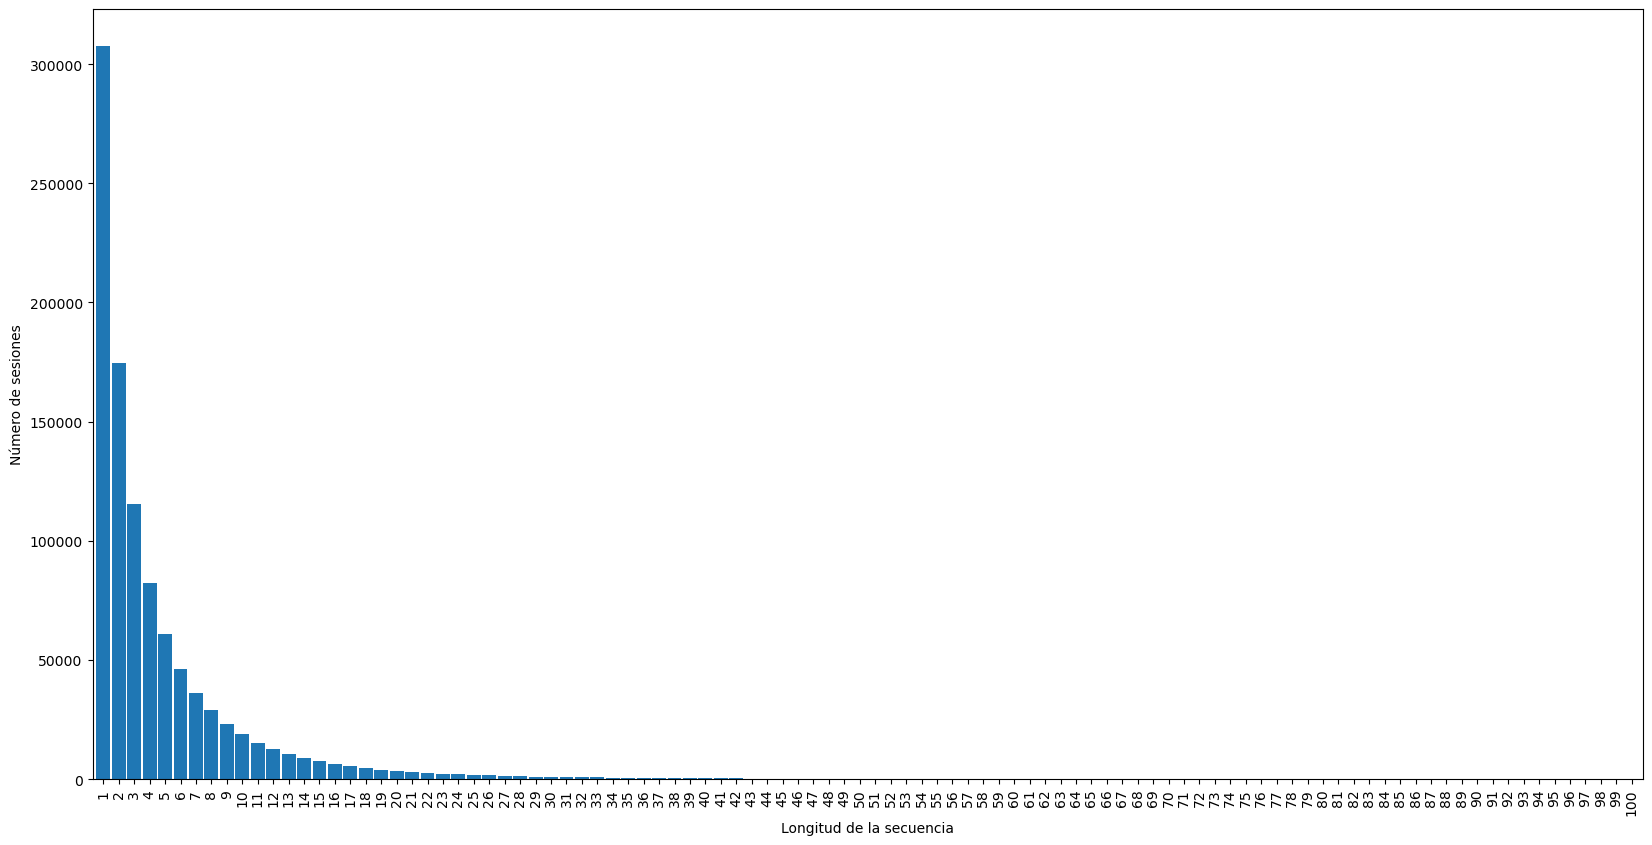

In [26]:
data_sessions_secuence = data_sessions.groupby('session_id').count().reset_index()
print(data_sessions_secuence.shape)
print(data_sessions_secuence.columns)
#data_sessions_secuence = data_sessions_secuence.drop('date', 1)
data_sessions_secuence = data_sessions_secuence.drop('date', axis=1)
data_sessions_secuence.columns = ['session_id', 'length']
data_sessions_secuence = data_sessions_secuence.sort_values(by='length', ascending=False)

print(data_sessions_secuence)

print(data_sessions_secuence['length'].value_counts().sort_index())



data_sessions_secuence['length'].value_counts().sort_index().plot(kind='bar', width=0.9, figsize=(20, 10))
plt.xlabel("Longitud de la secuencia")
plt.ylabel("Número de sesiones")
plt.show()

In [27]:
mean_session_itemcount = data_sessions_secuence['length'].mean()
print('Media de longitud de secuencias por sesión: ' +str(mean_session_itemcount) + ' articulos')
median_session_itemcount = data_sessions_secuence['length'].median()
print('Mediana de ...: ' +str(median_session_itemcount) + ' articulos')
mode_session_itemcount = data_sessions_secuence['length'].mode()[0]
print('Moda de ...: ' +str(mode_session_itemcount) + ' articulos')
max_session_itemcount = data_sessions_secuence['length'].max()
print('El mayor número de articulos consultados es de ' + str(max_session_itemcount) + ' articulos')
min_session_itemcount = data_sessions_secuence['length'].min()
print('Y el mínimo es de ' + str(min_session_itemcount) + ' articulo')

Media de longitud de secuencias por sesión: 4.74382 articulos
Mediana de ...: 3.0 articulos
Moda de ...: 1 articulos
El mayor número de articulos consultados es de 100 articulos
Y el mínimo es de 1 articulo


Sesiones -frias-

In [28]:
all_items = data_items_features['item_id'].unique()
used_items = pd.concat([data_sessions['item_id'], data_purchases['item_id']]).unique()

cold_items = all_items[~np.isin(all_items, used_items)]

cold_items, len(cold_items)

(array([  313,   366,   575,  1152,  1364,  1883,  2497,  2523,  2677,
         2694,  3185,  3529,  3754,  3835,  4042,  4514,  5214,  5394,
         6171,  6853,  6873,  6916,  7204,  7780,  8758,  8771,  8814,
         9384,  9418,  9589, 10463, 10671, 11125, 11933, 12667, 13376,
        13618, 13943, 13972, 14395, 14622, 14723, 14967, 15601, 15629,
        16206, 17046, 17206, 17576, 18482, 18690, 18837, 19637, 20237,
        21241, 21444, 21904, 21927, 21998, 22030, 22316, 22703, 22746,
        24303, 25035, 25277, 25521, 26201, 26232, 26742, 27377, 27728,
        27826], dtype=int64),
 73)

Las fechas y las estaciones

        session_id  item_id                     date         period
0                3    15085  2020-12-18 21:26:47.986  20:00 - 23:59
1               13    18626  2020-03-13 19:36:15.507  16:00 - 19:59
2               18    24911  2020-08-26 19:20:32.049  16:00 - 19:59
3               19    12534   2020-11-02 17:16:45.92  16:00 - 19:59
4               24    13226  2020-02-26 18:27:44.114  16:00 - 19:59
...            ...      ...                      ...            ...
999994     4439982    25770  2020-05-06 14:26:22.778  12:00 - 15:59
999996     4439990     8786  2020-08-22 14:28:22.382  12:00 - 15:59
999997     4439994    21630  2020-11-27 20:10:28.961  20:00 - 23:59
999998     4439999    16962  2020-11-27 11:01:41.356  08:00 - 11:59
999999     4440001    16631  2020-10-30 23:46:05.218  20:00 - 23:59

[687093 rows x 4 columns]
period
00:00 - 03:59     23945
04:00 - 07:59     47914
08:00 - 11:59    136721
12:00 - 15:59    149965
16:00 - 19:59    182537
20:00 - 23:59    146011
Name: 

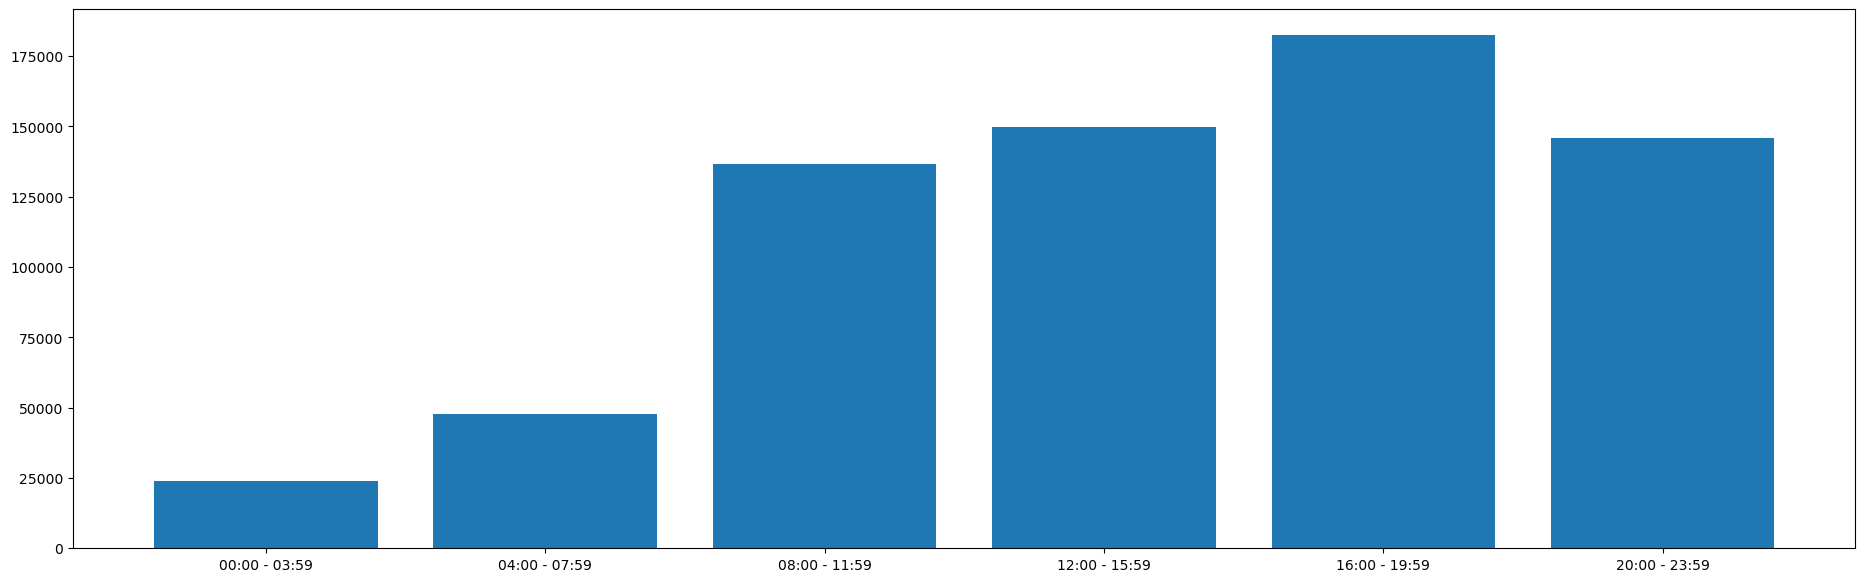

In [29]:
data_purchases_2020 = data_purchases[data_purchases['date'] <= '2020-12-31 23:59:59']
data_purchases_2021 = data_purchases[data_purchases['date'] > '2020-12-31 23:59:59']


purchases_per_period_2020 = data_purchases_2020.copy()

purchases_per_period_2020['period'] = [(pd.Timestamp(elem).hour // 4 + 1) for elem in purchases_per_period_2020['date']]
purchases_per_period_2020['period'].replace({1: '00:00 - 03:59',
                                             2: '04:00 - 07:59',
                                             3: '08:00 - 11:59',
                                             4: '12:00 - 15:59',
                                             5: '16:00 - 19:59',
                                             6: '20:00 - 23:59'},
                                            inplace=True)
print(purchases_per_period_2020)

purchases_per_period_2020_count = purchases_per_period_2020.groupby(['period'])['session_id'].nunique()

print(purchases_per_period_2020_count)

plt.figure(figsize=(23, 7))
plt.bar(purchases_per_period_2020_count.index, purchases_per_period_2020_count)
plt.show()

        session_id  item_id                     date         period
6               31     8345  2021-04-20 19:46:42.594  16:00 - 19:59
8               42    11784  2021-03-01 15:17:04.264  12:00 - 15:59
17             113    21107  2021-05-05 14:15:07.278  12:00 - 15:59
18             115    25976  2021-05-27 10:24:05.043  08:00 - 11:59
22             140    23502  2021-04-28 13:45:31.202  12:00 - 15:59
...            ...      ...                      ...            ...
999982     4439936     8060  2021-04-16 14:52:33.804  12:00 - 15:59
999986     4439949    16439  2021-05-12 05:49:24.294  04:00 - 07:59
999987     4439952    12845  2021-03-03 19:34:55.343  16:00 - 19:59
999988     4439953     2612  2021-04-02 11:31:29.357  08:00 - 11:59
999995     4439986     2915  2021-05-13 11:56:37.464  08:00 - 11:59

[312907 rows x 4 columns]
period
00:00 - 03:59    10184
04:00 - 07:59    15818
08:00 - 11:59    67742
12:00 - 15:59    76568
16:00 - 19:59    79526
20:00 - 23:59    63069
Name: sessio

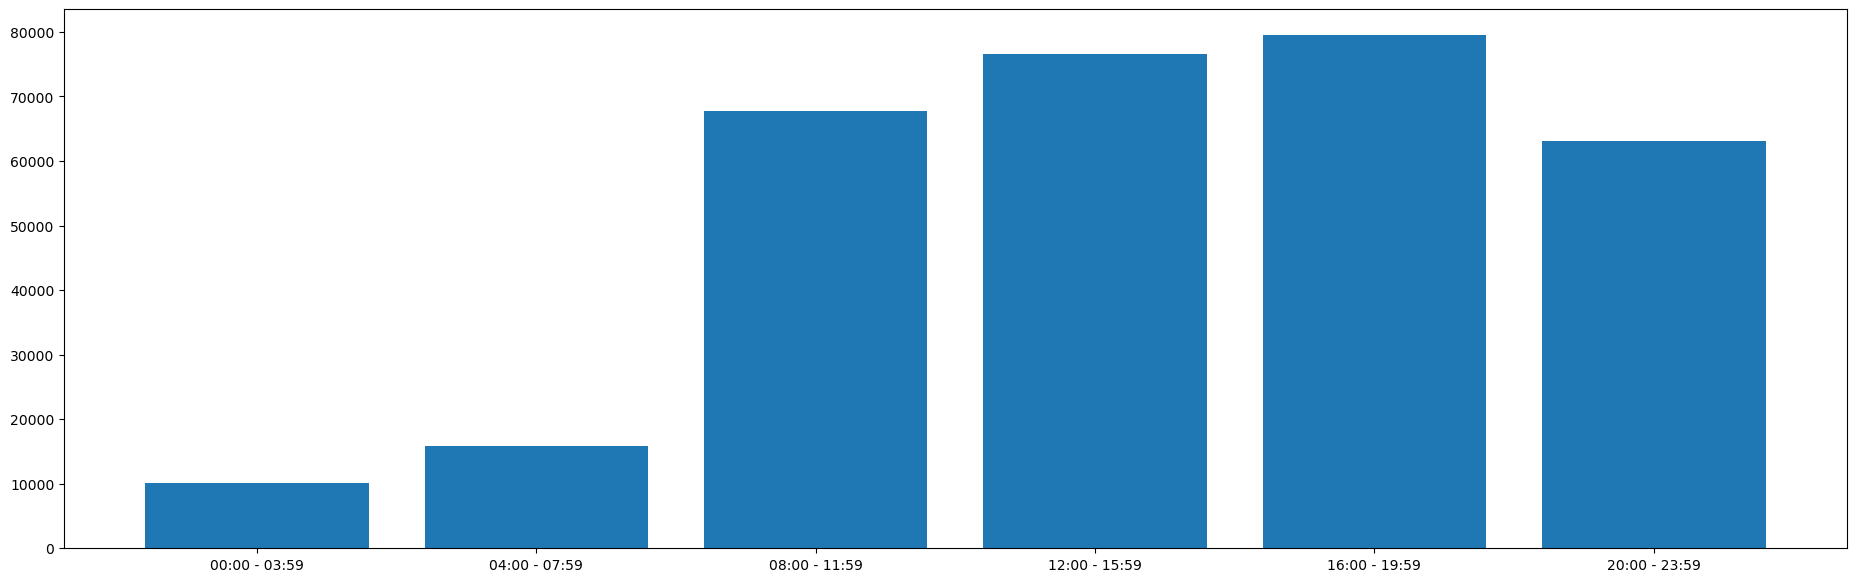

In [30]:
purchases_per_period_2021 = data_purchases_2021.copy()

purchases_per_period_2021['period'] = [(pd.Timestamp(elem).hour // 4 + 1) for elem in purchases_per_period_2021['date']]
purchases_per_period_2021['period'].replace({1: '00:00 - 03:59',
                                             2: '04:00 - 07:59',
                                             3: '08:00 - 11:59',
                                             4: '12:00 - 15:59',
                                             5: '16:00 - 19:59',
                                             6: '20:00 - 23:59'},
                                            inplace=True)
print(purchases_per_period_2021)

purchases_per_period_2021_count = purchases_per_period_2021.groupby(['period'])['session_id'].nunique()

print(purchases_per_period_2021_count)

plt.figure(figsize=(23, 7))
plt.bar(purchases_per_period_2021_count.index, purchases_per_period_2021_count)
plt.show()

Compras por hora

        session_id  item_id                     date           hour
0                3    15085  2020-12-18 21:26:47.986  21:00 - 21:59
1               13    18626  2020-03-13 19:36:15.507  19:00 - 19:59
2               18    24911  2020-08-26 19:20:32.049  19:00 - 19:59
3               19    12534   2020-11-02 17:16:45.92  17:00 - 17:59
4               24    13226  2020-02-26 18:27:44.114  18:00 - 18:59
...            ...      ...                      ...            ...
999994     4439982    25770  2020-05-06 14:26:22.778  14:00 - 14:59
999996     4439990     8786  2020-08-22 14:28:22.382  14:00 - 14:59
999997     4439994    21630  2020-11-27 20:10:28.961  20:00 - 20:59
999998     4439999    16962  2020-11-27 11:01:41.356  11:00 - 11:59
999999     4440001    16631  2020-10-30 23:46:05.218  23:00 - 23:59

[687093 rows x 4 columns]


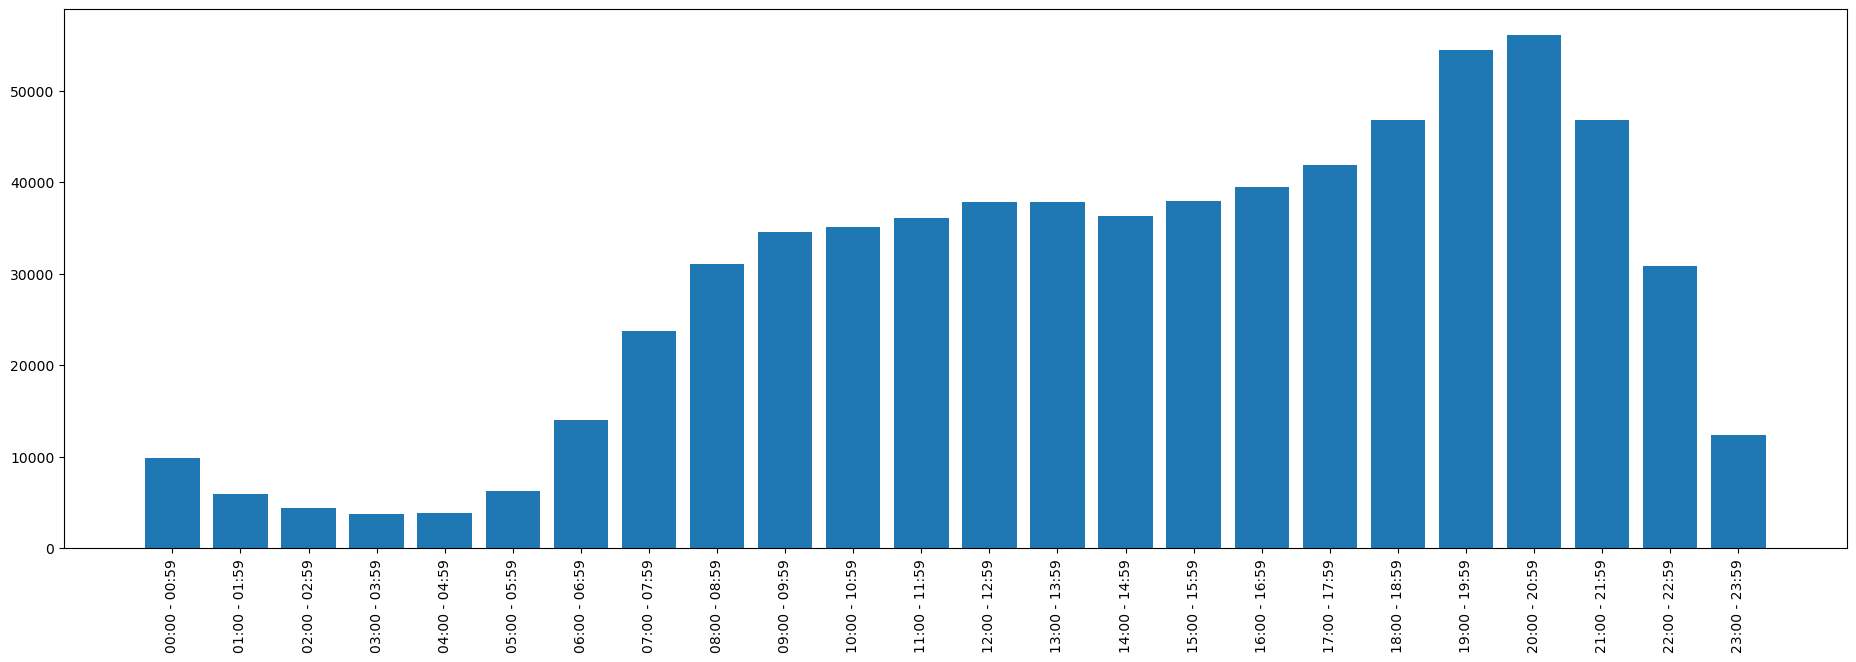

In [31]:
purchases_per_hour_2020 = data_purchases_2020.copy()

purchases_per_hour_2020['hour'] = ['0{}:00 - 0{}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour) if pd.Timestamp(elem).hour < 10
                                   else '{}:00 - {}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour)
                                   for elem in purchases_per_hour_2020['date']]

print(purchases_per_hour_2020)


purchases_per_hour_2020_count = purchases_per_hour_2020.groupby(['hour'])['session_id'].nunique()

purchases_per_hour_2020_count

plt.figure(figsize=(23, 7))
plt.bar(purchases_per_hour_2020_count.index, purchases_per_hour_2020_count)
plt.xticks(rotation=90)
plt.show()

        session_id  item_id                     date           hour
6               31     8345  2021-04-20 19:46:42.594  19:00 - 19:59
8               42    11784  2021-03-01 15:17:04.264  15:00 - 15:59
17             113    21107  2021-05-05 14:15:07.278  14:00 - 14:59
18             115    25976  2021-05-27 10:24:05.043  10:00 - 10:59
22             140    23502  2021-04-28 13:45:31.202  13:00 - 13:59
...            ...      ...                      ...            ...
999982     4439936     8060  2021-04-16 14:52:33.804  14:00 - 14:59
999986     4439949    16439  2021-05-12 05:49:24.294  05:00 - 05:59
999987     4439952    12845  2021-03-03 19:34:55.343  19:00 - 19:59
999988     4439953     2612  2021-04-02 11:31:29.357  11:00 - 11:59
999995     4439986     2915  2021-05-13 11:56:37.464  11:00 - 11:59

[312907 rows x 4 columns]
hour
00:00 - 00:59     4894
01:00 - 01:59     2580
02:00 - 02:59     1593
03:00 - 03:59     1117
04:00 - 04:59     1070
05:00 - 05:59     1727
06:00 - 06:59 

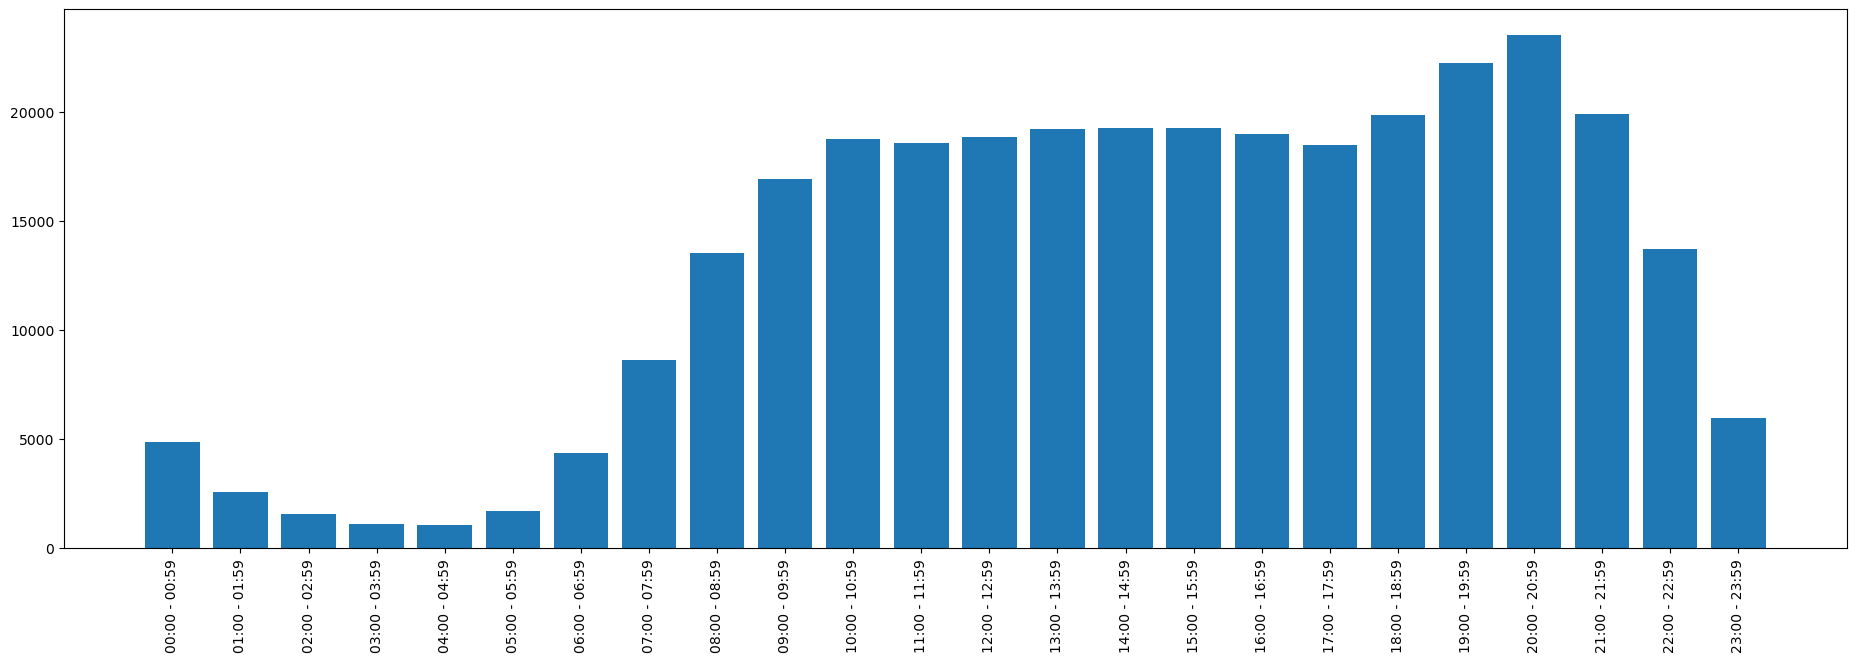

In [32]:
purchases_per_hour_2021 = data_purchases_2021.copy()

purchases_per_hour_2021['hour'] = ['0{}:00 - 0{}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour) if pd.Timestamp(elem).hour < 10
                                   else '{}:00 - {}:59'.format(pd.Timestamp(elem).hour, pd.Timestamp(elem).hour)
                                   for elem in purchases_per_hour_2021['date']]

print(purchases_per_hour_2021)

purchases_per_hour_2021_count = purchases_per_hour_2021.groupby(['hour'])['session_id'].nunique()

print(purchases_per_hour_2021_count)

plt.figure(figsize=(23, 7))
plt.bar(purchases_per_hour_2021_count.index, purchases_per_hour_2021_count)
plt.xticks(rotation=90)
plt.show()
     

Compras Semanales

Sobre el 0% de las compras se realiza durante los fines de semana
Lunes: 80081
Martes: 108652
Miércoles: 88640
Jueves: 88926
Viernes: 110867
Sábado: 116760
Domingo: 93167
Media: 98156


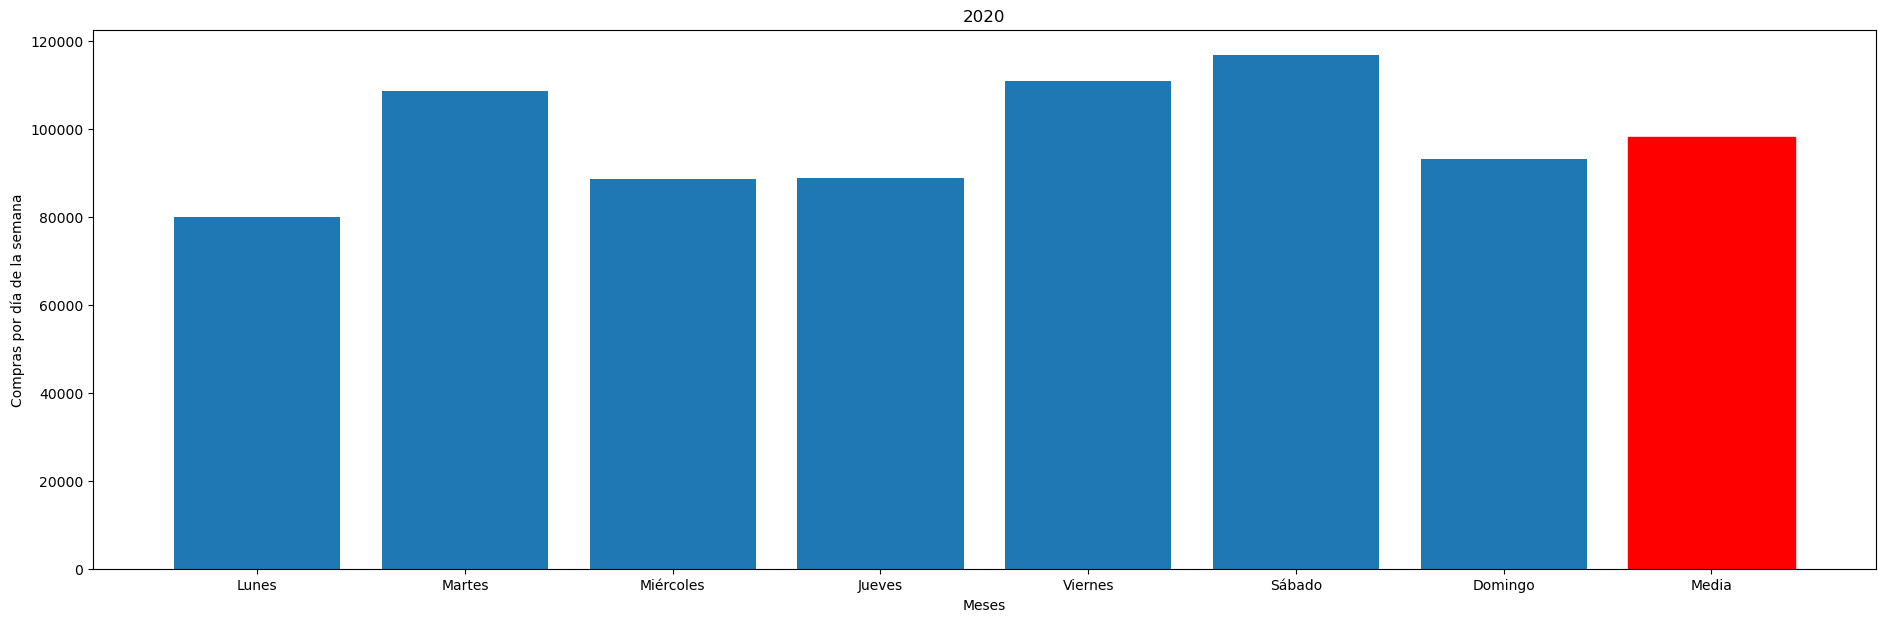

Lunes: 54590
Martes: 39173
Miércoles: 38703
Jueves: 41858
Viernes: 49335
Sábado: 45554
Domingo: 43694
Media: 44701


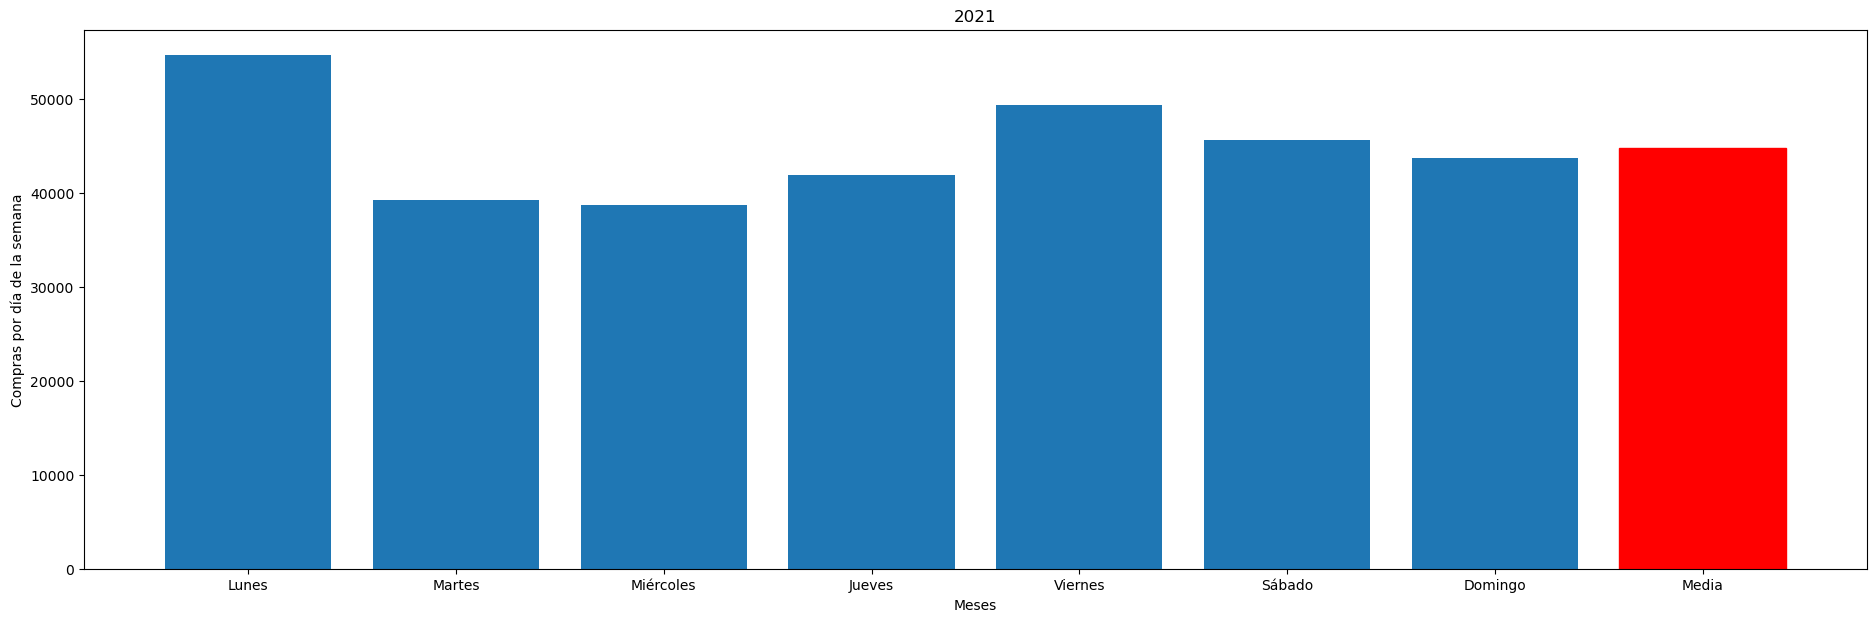

In [33]:
weekend_purchases = 0

for idx in data_purchases.index:
    if 5 <= pd.Timestamp(data_purchases['date'][idx]).weekday() <= 6:
        weekend_purchases += 1

print('Sobre el {}% de las compras se realiza durante los fines de semana'.format(round(weekend_purchases / len(data_purchases))))
                                                                                        
days_of_the_week = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'Media']

# 2020                                                                                        
purchases_per_day_2020 = [0 for _ in range(7)]

for idx in data_purchases_2020.index:
    day_idx = pd.Timestamp(data_purchases['date'][idx]).weekday()
    purchases_per_day_2020[day_idx] += 1

# np.average, para hacer medias ponderadas, como no es el caso, usamos np.mean
purchases_per_day_2020.append(round(np.mean(purchases_per_day_2020)))

for idx in range(len(days_of_the_week)):
    print('{}: {}'.format(days_of_the_week[idx], purchases_per_day_2020[idx]))

plt.figure(figsize=(23, 7))
barlist1 = plt.bar(days_of_the_week, purchases_per_day_2020)
barlist1[-1].set_color('r')
plt.title('2020')
plt.xlabel('Meses')
plt.ylabel('Compras por día de la semana')
plt.show()
                                                                                        
# 2021
purchases_per_day_2021 = [0 for _ in range(7)]

for idx in data_purchases_2021.index:
    day_idx = pd.Timestamp(data_purchases['date'][idx]).weekday()
    purchases_per_day_2021[day_idx] += 1
                                                                                        
purchases_per_day_2021.append(round(np.mean(purchases_per_day_2021)))

for idx in range(len(days_of_the_week)):
    print('{}: {}'.format(days_of_the_week[idx], purchases_per_day_2021[idx]))                                                                                        


plt.figure(figsize=(23, 7))
barlist2 = plt.bar(days_of_the_week, purchases_per_day_2021)
barlist2[-1].set_color('r')
plt.title('2021')
plt.xlabel('Meses')
plt.ylabel('Compras por día de la semana')
plt.show()                                                                                        

Compras al mes

Enero: 38682
Febrero: 31033
Marzo: 37876
Abril: 58695
Mayo: 48115
Junio: 60636
Julio: 53566
Agosto: 59955
Septiembre: 72153
Octubre: 63826
Noviembre: 90848
Diciembre: 71708
Media: 57257.75


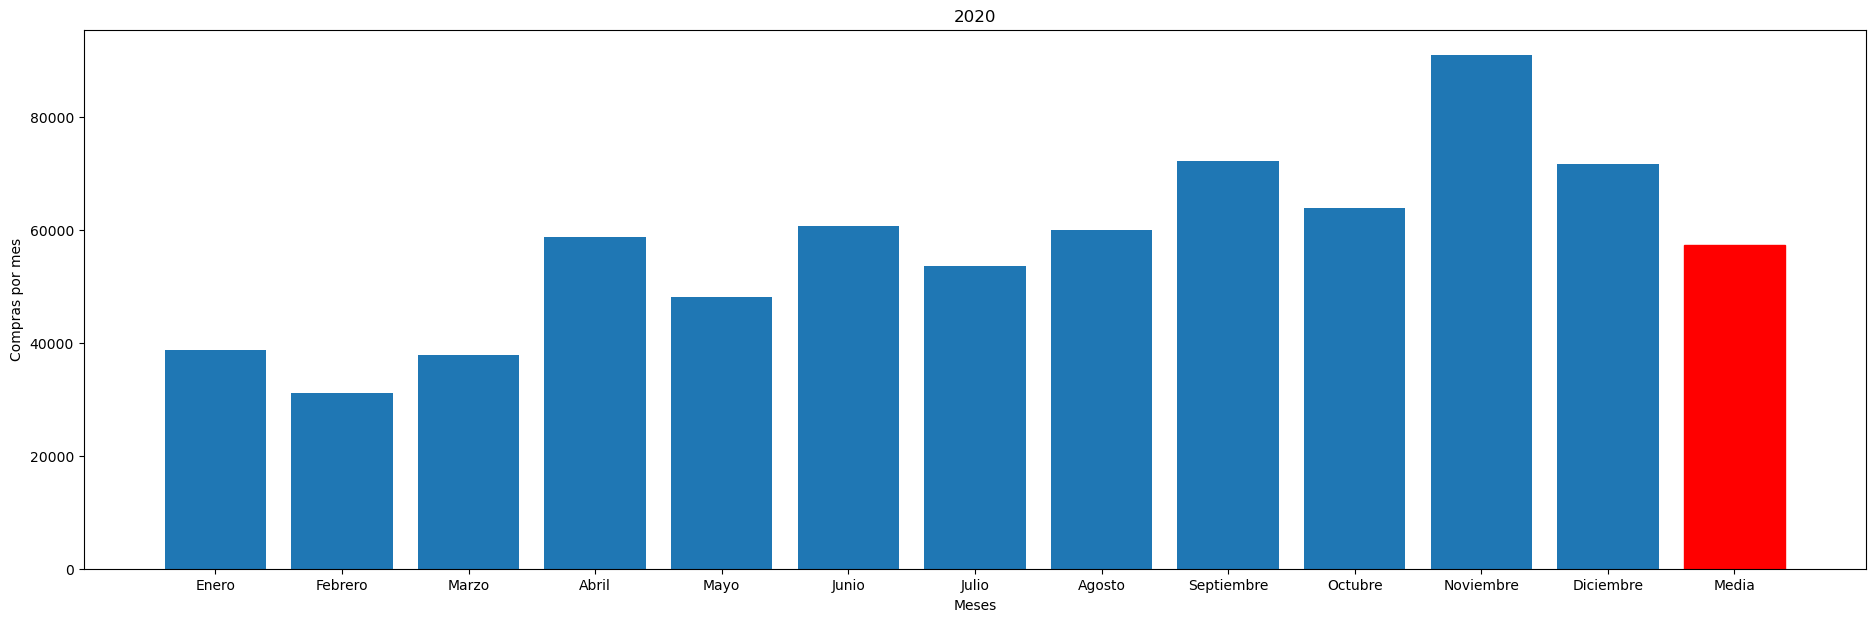

Enero: 52923
Febrero: 42912
Marzo: 65709
Abril: 69745
Mayo: 81618
Media: 62581.4


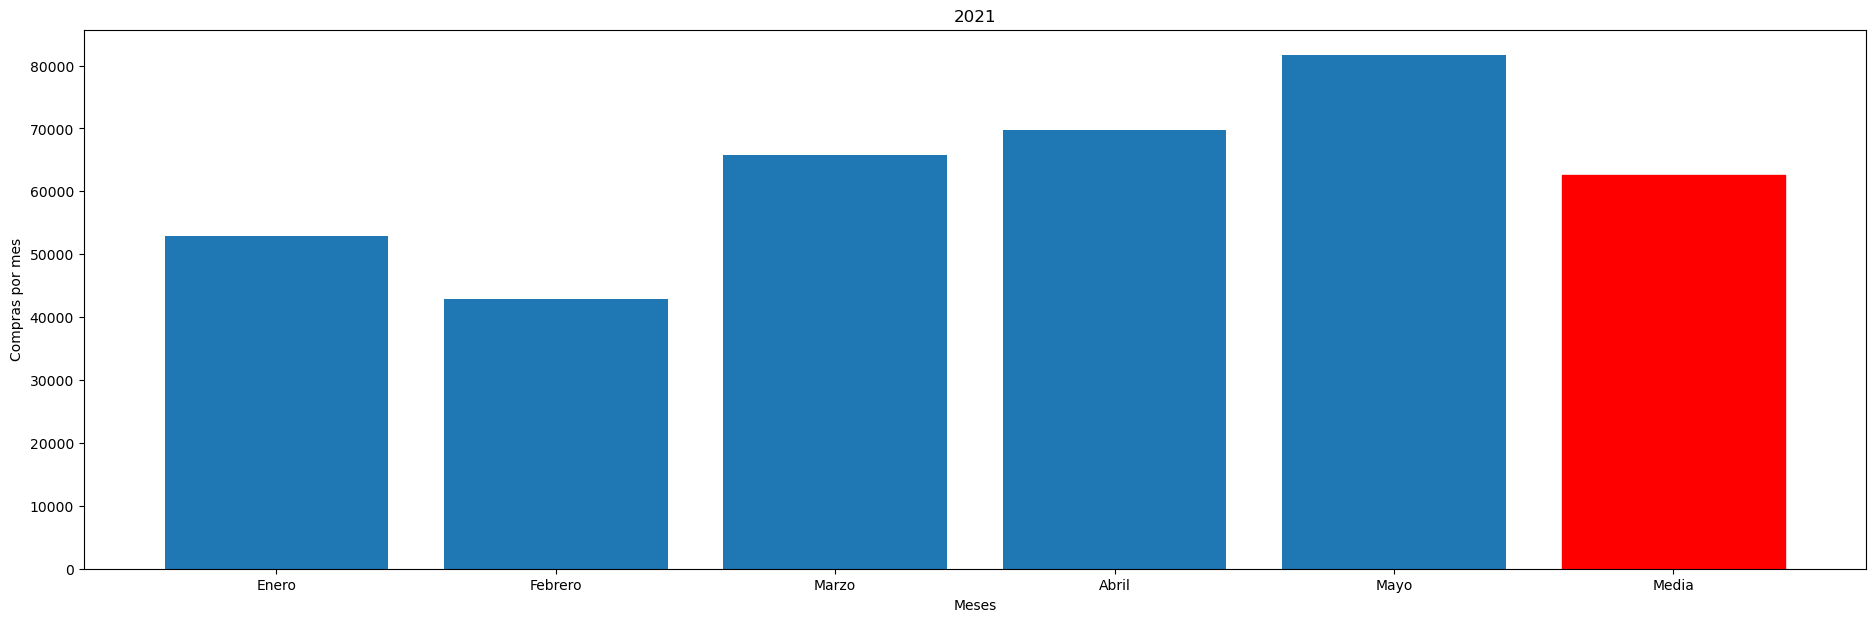

In [34]:
import numpy as np

meses_2020 = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Media']

purchases_per_month_2020 = [0 for _ in range(12)]

for idx in data_purchases_2020.index:
    month_idx = int(data_purchases_2020['date'][idx][5:7]) - 1
    purchases_per_month_2020[month_idx] += 1

purchases_per_month_2020.append(np.mean(purchases_per_month_2020))

for idx in range(len(meses_2020)):
  print('{}: {}'.format(meses_2020[idx], purchases_per_month_2020[idx]))

plt.figure(figsize=(23, 7))
barlist3 = plt.bar(meses_2020, purchases_per_month_2020)
barlist3[-1].set_color('r')
plt.title('2020')
plt.xlabel('Meses')
plt.ylabel('Compras por mes')
plt.show()

# 2021
meses_2021 = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Media']

purchases_per_month_2021 = [0 for _ in range(5)]

for idx in data_purchases_2021.index:
    month_idx = int(data_purchases_2021['date'][idx][5:7]) - 1
    purchases_per_month_2021[month_idx] += 1

purchases_per_month_2021.append(np.mean(purchases_per_month_2021))

for idx in range(len(meses_2021)):
  print('{}: {}'.format(meses_2021[idx], purchases_per_month_2021[idx]))    

plt.figure(figsize=(23, 7))
barlist4 = plt.bar(meses_2021, purchases_per_month_2021)
barlist4[-1].set_color('r')
plt.title('2021')
plt.xlabel('Meses')
plt.ylabel('Compras por mes')
plt.show()

Top 5 articulos al mes

C:\Users\sumartin\AppData\Local\Temp\ipykernel_17832\912362884.py:10: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  purchased_items_per_month_2020_df = pd.DataFrame(purchased_items_per_month_2020, dtype=int).transpose()


         Enero  Febrero    Marzo    Abril     Mayo    Junio    Julio   Agosto  \
0       4016.0  13226.0  18626.0  24022.0  26394.0  14532.0  15501.0  24911.0   
1      25117.0   8321.0  12556.0  27613.0   2011.0  18532.0  20563.0  24836.0   
2      17882.0   4167.0  15623.0   3162.0  28057.0  21534.0   5610.0  11065.0   
3      13538.0   3913.0  20691.0  16660.0   3732.0  27998.0  13226.0   8167.0   
4      25681.0  13699.0   6419.0   8706.0  26160.0  28139.0   4612.0   7665.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
90843      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
90844      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
90845      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
90846      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
90847      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

       Septiembre  Octubre 

C:\Users\sumartin\AppData\Local\Temp\ipykernel_17832\912362884.py:44: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  purchased_items_per_month_2021_df = pd.DataFrame(purchased_items_per_month_2021, dtype=int).transpose()


         Enero  Febrero    Marzo    Abril     Mayo
0      20208.0  18742.0  11784.0   8345.0  21107.0
1       1631.0  23852.0   1368.0  23502.0  25976.0
2       7046.0  17747.0  17376.0    419.0   8840.0
3       3423.0  27869.0  24738.0  16572.0   4309.0
4      11784.0  20156.0   9683.0   6790.0  25415.0
...        ...      ...      ...      ...      ...
81613      NaN      NaN      NaN      NaN  21107.0
81614      NaN      NaN      NaN      NaN   3567.0
81615      NaN      NaN      NaN      NaN  23993.0
81616      NaN      NaN      NaN      NaN  16439.0
81617      NaN      NaN      NaN      NaN   2915.0

[81618 rows x 5 columns]


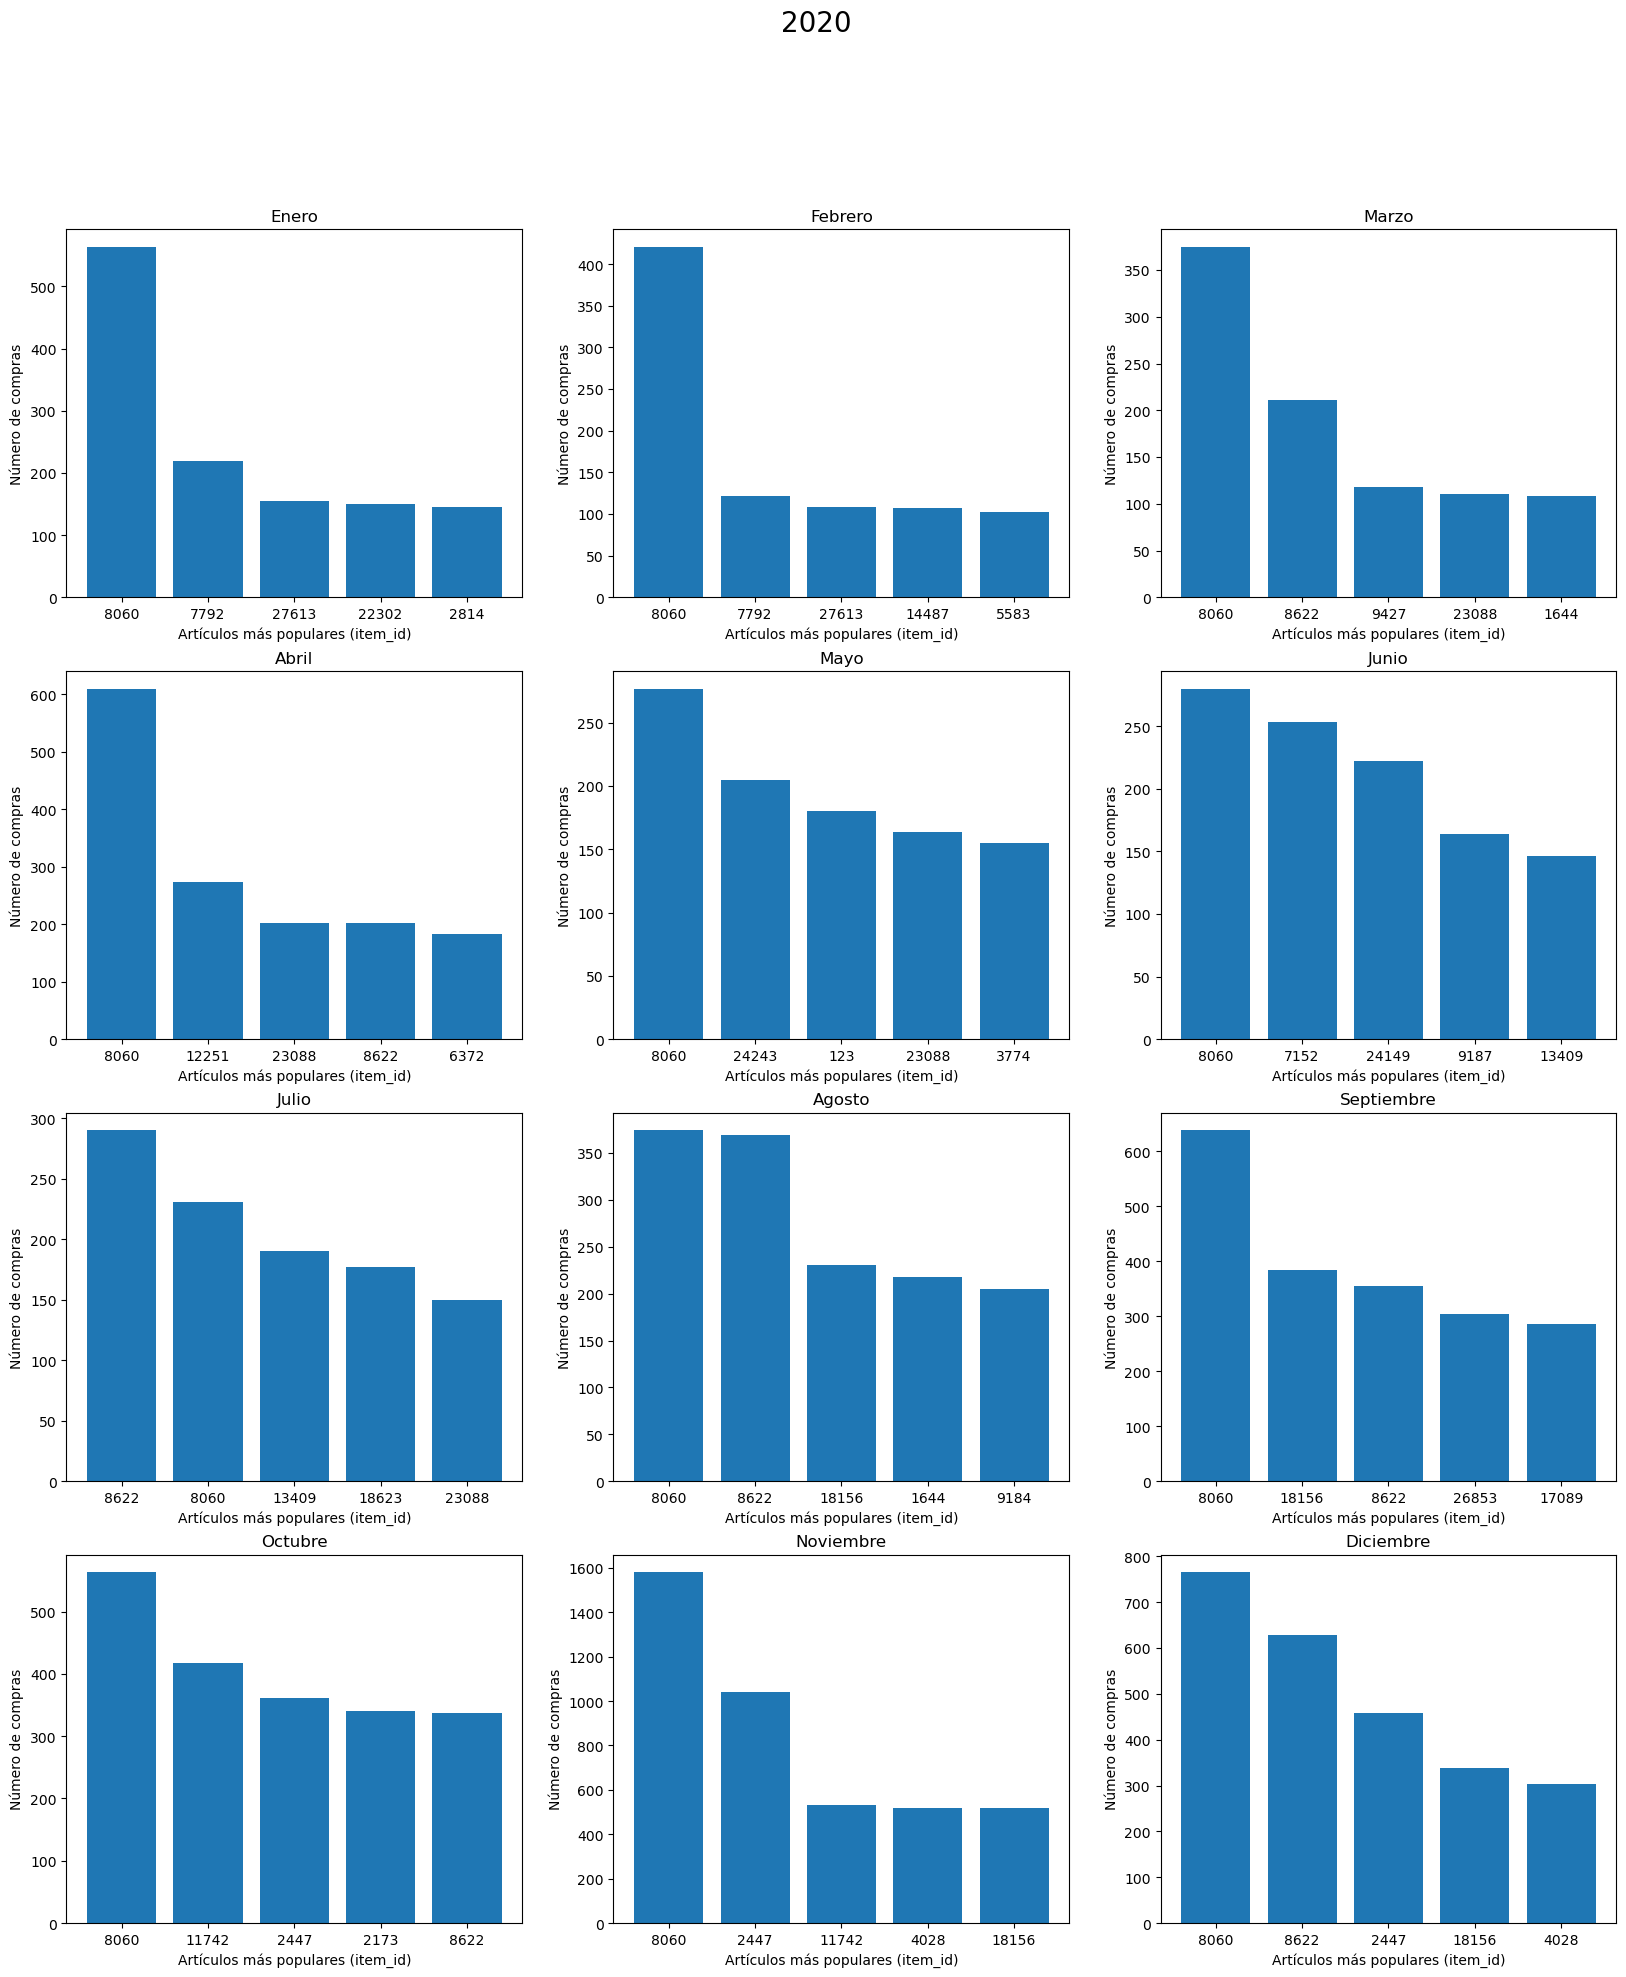

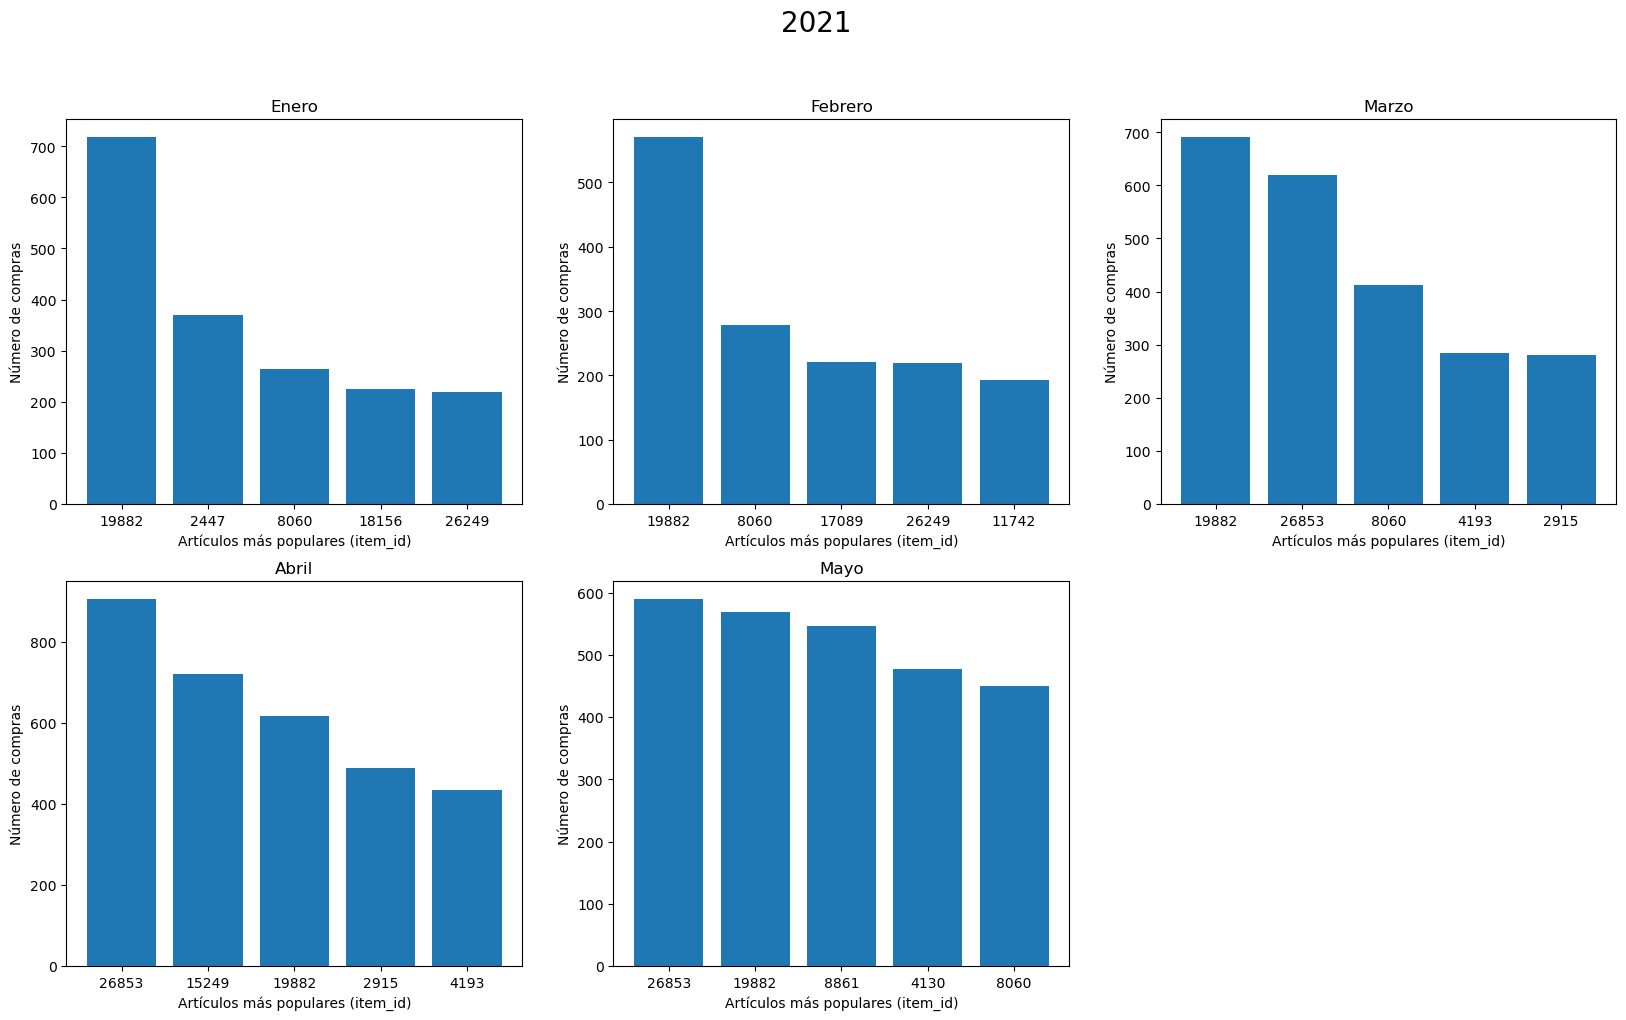

In [35]:
max_item_id = max(data_purchases['item_id'])

# 2020
purchased_items_per_month_2020 = [[] for _ in range(12)]

for idx in data_purchases_2020.index:
    month_idx = int(data_purchases_2020['date'][idx][5:7]) - 1
    purchased_items_per_month_2020[month_idx].append(data_purchases_2020['item_id'][idx])

purchased_items_per_month_2020_df = pd.DataFrame(purchased_items_per_month_2020, dtype=int).transpose()

meses_2020 = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
              'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
purchased_items_per_month_2020_df.columns = meses_2020

print(purchased_items_per_month_2020_df)

fig, axs = plt.subplots(4, 3, figsize=(20, 22))
fig.suptitle('2020', fontsize=20)

for i in range(12):

    count_df = purchased_items_per_month_2020_df.groupby([meses_2020[i]])[meses_2020[i]].count()
    sorted_count_df = count_df.sort_values(ascending=False)
    x = sorted_count_df.index.to_numpy()[:5]
    y = sorted_count_df.to_numpy()[:5]

    values = [0, 1, 2, 3, 4]

    axs[int(i/3), i%3].bar(values, y)
    axs[int(i/3), i%3].set_xticks(values, minor=False)
    axs[int(i/3), i%3].set_xticklabels([str(round(elem)) for elem in x])
    axs[int(i/3), i%3].set_title(meses_2020[i])
    axs[int(i/3), i%3].set_xlabel('Artículos más populares (item_id)')
    axs[int(i/3), i%3].set_ylabel('Número de compras')

# 2021
purchased_items_per_month_2021 = [[] for _ in range(5)]

for idx in data_purchases_2021.index:
    month_idx = int(data_purchases_2021['date'][idx][5:7]) - 1
    purchased_items_per_month_2021[month_idx].append(data_purchases_2021['item_id'][idx])
    
purchased_items_per_month_2021_df = pd.DataFrame(purchased_items_per_month_2021, dtype=int).transpose()

meses_2021 = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']
purchased_items_per_month_2021_df.columns = meses_2021

print(purchased_items_per_month_2021_df)

fig, axs = plt.subplots(2, 3, figsize=(20, 11))
fig.delaxes(axs[-1, -1])
fig.suptitle('2021', fontsize=20)

for i in range(5):

    count_df = purchased_items_per_month_2021_df.groupby([meses_2021[i]])[meses_2021[i]].count()
    sorted_count_df = count_df.sort_values(ascending=False)

    x = sorted_count_df.index.to_numpy()[:5]
    y = sorted_count_df.to_numpy()[:5]

    values = [0, 1, 2, 3, 4]

    axs[int(i/3), i%3].bar(values, y)
    axs[int(i/3), i%3].set_xticks(values, minor=False)
    axs[int(i/3), i%3].set_xticklabels([str(round(elem)) for elem in x])
    axs[int(i/3), i%3].set_title(meses_2021[i])
    axs[int(i/3), i%3].set_xlabel('Artículos más populares (item_id)')
    axs[int(i/3), i%3].set_ylabel('Número de compras')
     